In [1]:
!pip install easyocr
!pip install imutils


[notice] A new release of pip is available: 23.3 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

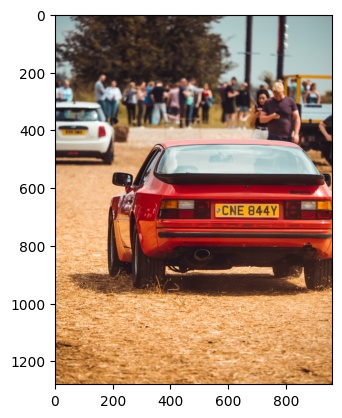

In [2]:
gambar = cv2.imread(r'C:\Users\exame\Documents\UAS\mobil1.jpeg')
gambar_rgb = cv2.cvtColor(gambar, cv2.COLOR_BGR2RGB)

plt.imshow(gambar_rgb)
plt.show()

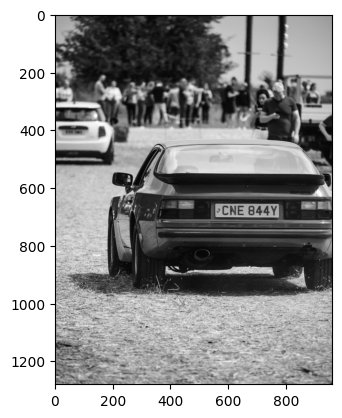

In [3]:
# Ubah gambar ke grayscale
gray = cv2.cvtColor(gambar, cv2.COLOR_BGR2GRAY)

# Tampilkan gambar greyscale
plt.imshow(gray, cmap='gray')

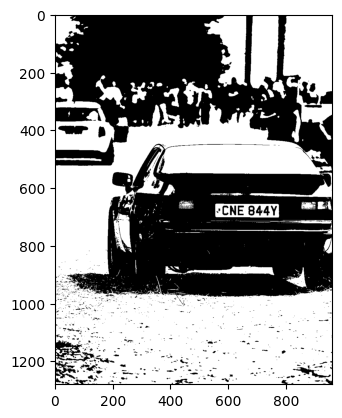

In [5]:
# Menggunakan thresholding sederhana
ret, thresh1 = cv2.threshold(gray, 130, 255, cv2.THRESH_BINARY)

# Menampilkan hasil thresholding
plt.imshow(thresh1, cmap='gray')
plt.show()

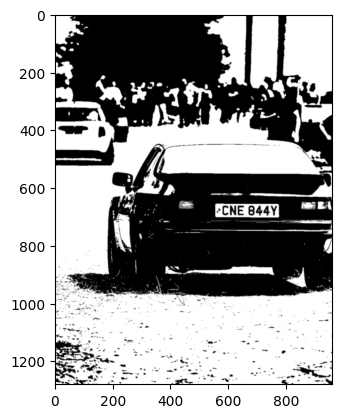

In [42]:
# Menerapkan Gaussian blur
blurred = cv2.GaussianBlur(thresh1, (5, 5), 0)

# Menampilkan hasil Gaussian blur
plt.imshow(blurred, cmap='gray')
plt.show()

In [43]:
# Menemukan Kontur 
keypoints = cv2.findContours(blurred.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)

# Urutkan kontur berdasarkan area dalam urutan menurun dan simpan 10 kontur teratas
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [44]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [45]:
location

array([[[552, 656]],

       [[555, 704]],

       [[776, 701]],

       [[772, 655]]], dtype=int32)

In [46]:
mask = np.zeros(gray.shape, dtype=np.uint8)
gambar1 = cv2.drawContours(mask, [location], 0, 255, -1)
gambar1 = cv2.bitwise_and(gambar, gambar, mask=mask)

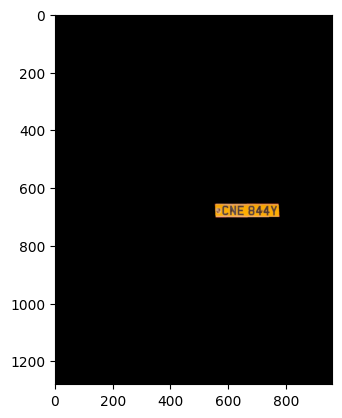

In [47]:
plt.imshow(cv2.cvtColor(gambar1, cv2.COLOR_BGR2RGB))

In [48]:
(x, y) = np.where(mask == 255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_gambar1 = gray[x1:x2+1, y1:y2+1]

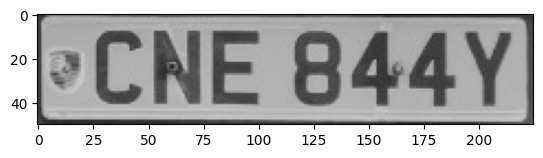

In [49]:
plt.imshow(cv2.cvtColor(cropped_gambar1, cv2.COLOR_BGR2RGB))

In [50]:
reader = easyocr.Reader(['id'])
result = reader.readtext(cropped_gambar1)

# Menggabungkan semua teks menjadi satu string
detected_text = ' '.join([item[1] for item in result])

# Mencetak teks hasil deteksi dalam satu baris
print(detected_text)

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


CNE 844Y


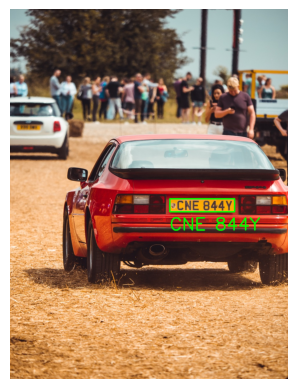

In [51]:
detected_text = result[0][1] 
font = cv2.FONT_HERSHEY_SIMPLEX

res = cv2.putText(gambar, text=detected_text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=2, color=(0, 255, 0), thickness=3, lineType=cv2.LINE_AA)
res = cv2.rectangle(gambar, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0), 3)

plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()